In this notebook we:
* use a deep neural net to get features of images and then cluster them using k-means, based on https://stackoverflow.com/a/57451142

In [2]:
import matplotlib.pyplot as plt

In [3]:
# ! pip install tensorflow

In [4]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

Using TensorFlow backend.


In [5]:
# Variables
imdir = '/Users/jedrzej/Projects/Gabon/data_dive/data_sample'
targetdir = "/Users/jedrzej/Projects/Gabon/data_dive/data_sample_clustered/"
number_clusters = 5

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

# Clustering
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

# Copy images renamed by cluster 
# Check if target dir exists
try:
    os.makedirs(targetdir)
except OSError:
    pass
# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir + str(m) + "_" + filelist[i][-10])

    Status: 36 / 37



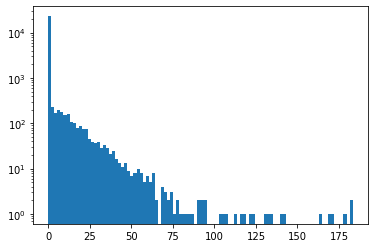

In [6]:
plt.hist(featurelist[0],100)
plt.yscale('log')

In [7]:
len(featurelist)

37